# Breast Cancer Classification

## Introduction 

This project aims to classify breast cancer cells as benign or malignant with a high accuracy rate.

### About Dataset 

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.  
The 3-dimensional space is described in:  
[K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

The database can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29).

#### Attribute Information:

1. **ID number**
2. **Diagnosis** (M = malignant, B = benign)
3. **Features (3-32):**

    - a) **Radius** (mean of distances from center to points on the perimeter)
    - b) **Texture** (standard deviation of gray-scale values)
    - c) **Perimeter**
    - d) **Area**
    - e) **Smoothness** (local variation in radius lengths)
    - f) **Compactness** (perimeter² / area - 1.0)
    - g) **Concavity** (severity of concave portions of the contour)
    - h) **Concave points** (number of concave portions of the contour)
    - i) **Symmetry**
    - j) **Fractal dimension** ("coastline approximation" - 1)

The mean, standard error, and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is **Mean Radius**, field 13 is **Radius SE**, field 23 is **Worst Radius**.

All feature values are recorded with four significant digits.

**Missing attribute values:** None

**Class distribution:** 357 benign, 212 malignant


## Python Libraries

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis,LocalOutlierFactor
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

## Read and Data Analyse

In [62]:
data=pd.read_csv("data.csv")

In [63]:
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [64]:
data.drop(["Unnamed: 32","id"],inplace=True,axis=1)

In [65]:
data.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [66]:
data=data.rename(columns={"diagnosis":"target"})

<Axes: xlabel='target', ylabel='count'>

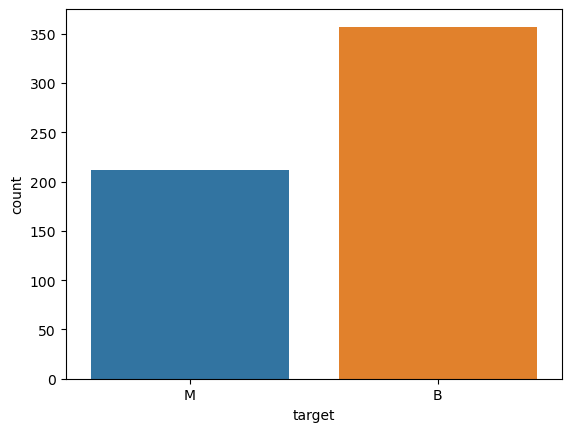

In [67]:
sns.countplot(x=data["target"])

In [68]:
print(data.target.value_counts())

target
B    357
M    212
Name: count, dtype: int64


In [69]:
data["target"]=[1 if i.strip()=="M" else 0 for i in data.target]

In [70]:
print("Data Shape: ",data.shape)

Data Shape:  (569, 31)


In [71]:
data.describe().T

count        mean         std         min  \
target                   569.0    0.372583    0.483918    0.000000   
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.088799    0.079720    0.000000   
concave points_mean      569.0    0.048919    0.038803    0.000000   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.360200   
perimeter_se             569.0    2.866059    2.021855    0.757000   
area_se                  569.0   40.337079   45.491006    6.802000   
smoothness_se            569.0    0.007041    0.003003    0.001713   
compactness_se           569.0    0.025478    0.017908    0.002252   
concavity_se             569.0    0.031894    0.030186    0.000000   
concave points_se        569.0    0.011796    0.006170    0.000000   
symmetry_se              569.0    0.020542    0.008266    0.007882   
fractal_dimension_se     569.0    0.003795    0.002646    0.000895   
radius_worst             569.0   16.269190    4.833242    7.930000   
texture_worst            569.0   25.677223    6.146258   12.020000   
perimeter_worst          569.0  107.261213   33.602542   50.410000   
area_worst               569.0  880.583128  569.356993  185.200000   
smoothness_worst         569.0    0.132369    0.022832    0.071170   
compactness_worst        569.0    0.254265    0.157336    0.027290   
concavity_worst          569.0    0.272188    0.208624    0.000000   
concave points_worst     569.0    0.114606    0.065732    0.000000   
symmetry_worst           569.0    0.290076    0.061867    0.156500   
fractal_dimension_worst  569.0    0.083946    0.018061    0.055040   

                                25%         50%          75%         max  
target                     0.000000    0.000000     1.000000     1.00000  
radius_mean               11.700000   13.370000    15.780000    28.11000  
texture_mean              16.170000   18.840000    21.800000    39.28000  
perimeter_mean            75.170000   86.240000   104.100000   188.50000  
area_mean                420.300000  551.100000   782.700000  2501.00000  
smoothness_mean            0.086370    0.095870     0.105300     0.16340  
compactness_mean           0.064920    0.092630     0.130400     0.34540  
concavity_mean             0.029560    0.061540     0.130700     0.42680  
concave points_mean        0.020310    0.033500     0.074000     0.20120  
symmetry_mean              0.161900    0.179200     0.195700     0.30400  
fractal_dimension_mean     0.057700    0.061540     0.066120     0.09744  
radius_se                  0.232400    0.324200     0.478900     2.87300  
texture_se                 0.833900    1.108000     1.474000     4.88500  
perimeter_se               1.606000    2.287000     3.357000    21.98000  
area_se                   17.850000   24.530000    45.190000   542.20000  
smoothness_se              0.005169    0.006380     0.008146     0.03113  
compactness_se             0.013080    0.020450     0.032450     0.13540  
concavity_se               0.015090    0.025890     0.042050     0.39600  
concave points_se          0.007638    0.010930     0.014710     0.05279  
symmetry_se                0.015160    0.018730     0.023480     0.07895  
fractal_dimension_se       0.002248    0.003187     0.004558     0.02984  
radius_worst              13.010000   14.970000    18.790000    36.04000  
texture_worst             21.080000   25.410000    29.72000

* Since there is a huge difference in scale between the data, the data should be standardized.

## EDA

In [72]:
# correlation analysis
corr_matrix=data.corr()

In [73]:
corr_matrix

target  radius_mean  texture_mean  perimeter_mean  \
target                   1.000000     0.730029      0.415185        0.742636   
radius_mean              0.730029     1.000000      0.323782        0.997855   
texture_mean             0.415185     0.323782      1.000000        0.329533   
perimeter_mean           0.742636     0.997855      0.329533        1.000000   
area_mean                0.708984     0.987357      0.321086        0.986507   
smoothness_mean          0.358560     0.170581     -0.023389        0.207278   
compactness_mean         0.596534     0.506124      0.236702        0.556936   
concavity_mean           0.696360     0.676764      0.302418        0.716136   
concave points_mean      0.776614     0.822529      0.293464        0.850977   
symmetry_mean            0.330499     0.147741      0.071401        0.183027   
fractal_dimension_mean  -0.012838    -0.311631     -0.076437       -0.261477   
radius_se                0.567134     0.679090      0.275869        0.691765   
texture_se              -0.008303    -0.097317      0.386358       -0.086761   
perimeter_se             0.556141     0.674172      0.281673        0.693135   
area_se                  0.548236     0.735864      0.259845        0.744983   
smoothness_se           -0.067016    -0.222600      0.006614       -0.202694   
compactness_se           0.292999     0.206000      0.191975        0.250744   
concavity_se             0.253730     0.194204      0.143293        0.228082   
concave points_se        0.408042     0.376169      0.163851        0.407217   
symmetry_se             -0.006522    -0.104321      0.009127       -0.081629   
fractal_dimension_se     0.077972    -0.042641      0.054458       -0.005523   
radius_worst             0.776454     0.969539      0.352573        0.969476   
texture_worst            0.456903     0.297008      0.912045        0.303038   
perimeter_worst          0.782914     0.965137      0.358040        0.970387   
area_worst               0.733825     0.941082      0.343546        0.941550   
smoothness_worst         0.421465     0.119616      0.077503        0.150549   
compactness_worst        0.590998     0.413463      0.277830        0.455774   
concavity_worst          0.659610     0.526911      0.301025        0.563879   
concave points_worst     0.793566     0.744214      0.295316        0.771241   
symmetry_worst           0.416294     0.163953      0.105008        0.189115   
fractal_dimension_worst  0.323872     0.007066      0.119205        0.051019   

                         area_mean  smoothness_mean  compactness_mean  \
target                    0.708984         0.358560          0.596534   
radius_mean               0.987357         0.170581          0.506124   
texture_mean              0.321086        -0.023389          0.236702   
perimeter_mean            0.986507         0.207278          0.556936   
area_mean                 1.000000         0.177028          0.498502   
smoothness_mean           0.177028         1.000000          0.659123   
compactness_mean          0.498502         0.659123          1.000000   
concavity_mean            0.685983         0.521984          0.883121   
concave points_mean       0.823269         0.553695          0.831135   
symmetry_mean             0.151293         0.557775          0.602641   
fractal_dimension_mean   -0.283110         0.584792          0.565369   
radius_se                 0.732562         0.301467          0.497473   
texture_se               -0.066280         0.068406          0.046205   
perimeter_se              0.726628         0.296092          0.548905   
area_se                   0.800086         0.246552          0.455653   
smoothness_se            -0.166777         0.332375          0.135299   
compactness_se            0.212583         0.318943          0.738722   
concavity_se              0.207660         0.248396          0.570517   
concave points_se         0.372320         0.380676          0.642262   
symmet

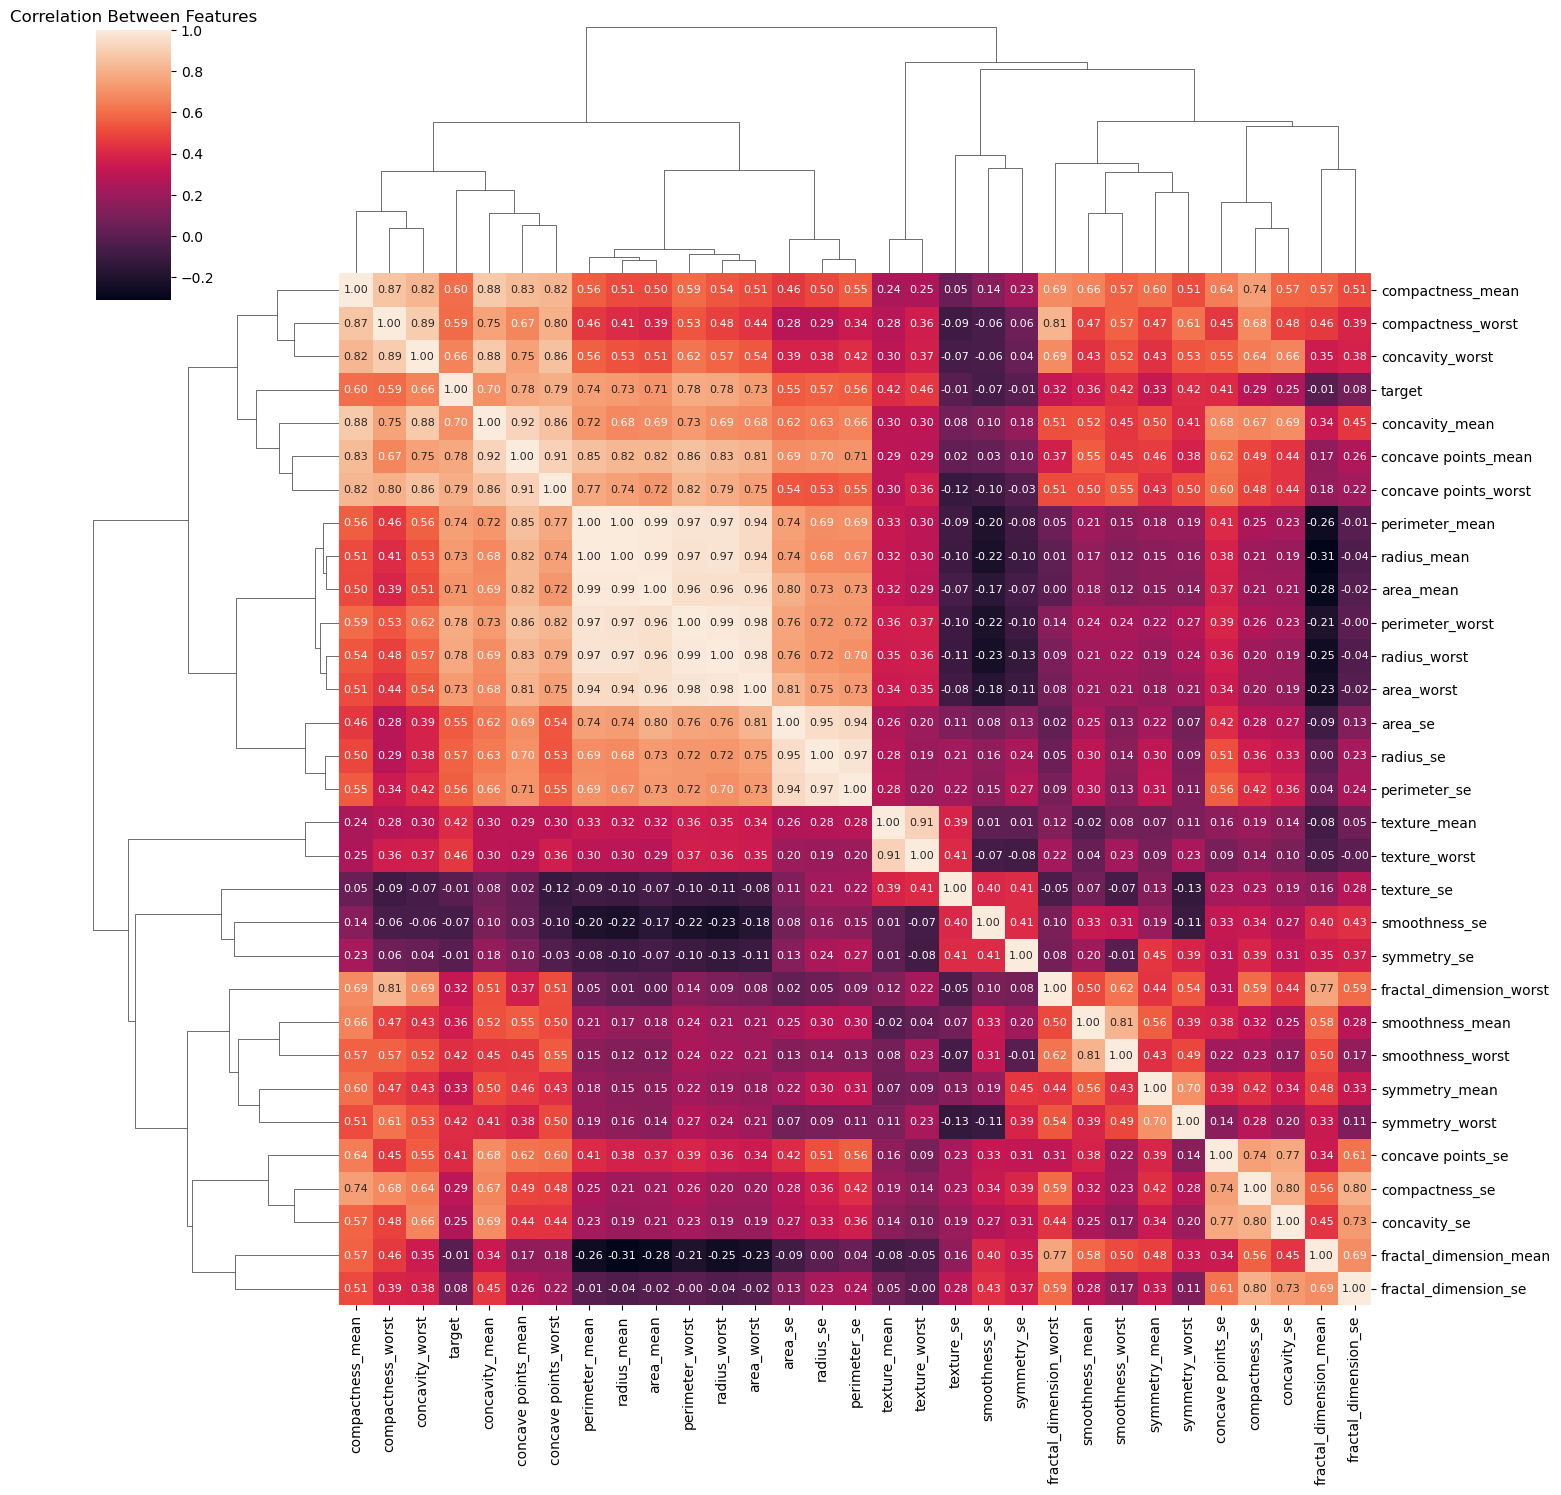

In [74]:
sns.clustermap(corr_matrix,annot=True,fmt=".2f",annot_kws={"size": 8}, figsize=(15, 15))
plt.title("Correlation Between Features")
plt.show()

* There are features in the data that are highly correlated with each other. Feature selection process can be applied here.

In [75]:
threshold=0.5
filtre= np.abs(corr_matrix["target"])>threshold
corr_features=corr_matrix.columns[filtre].tolist()

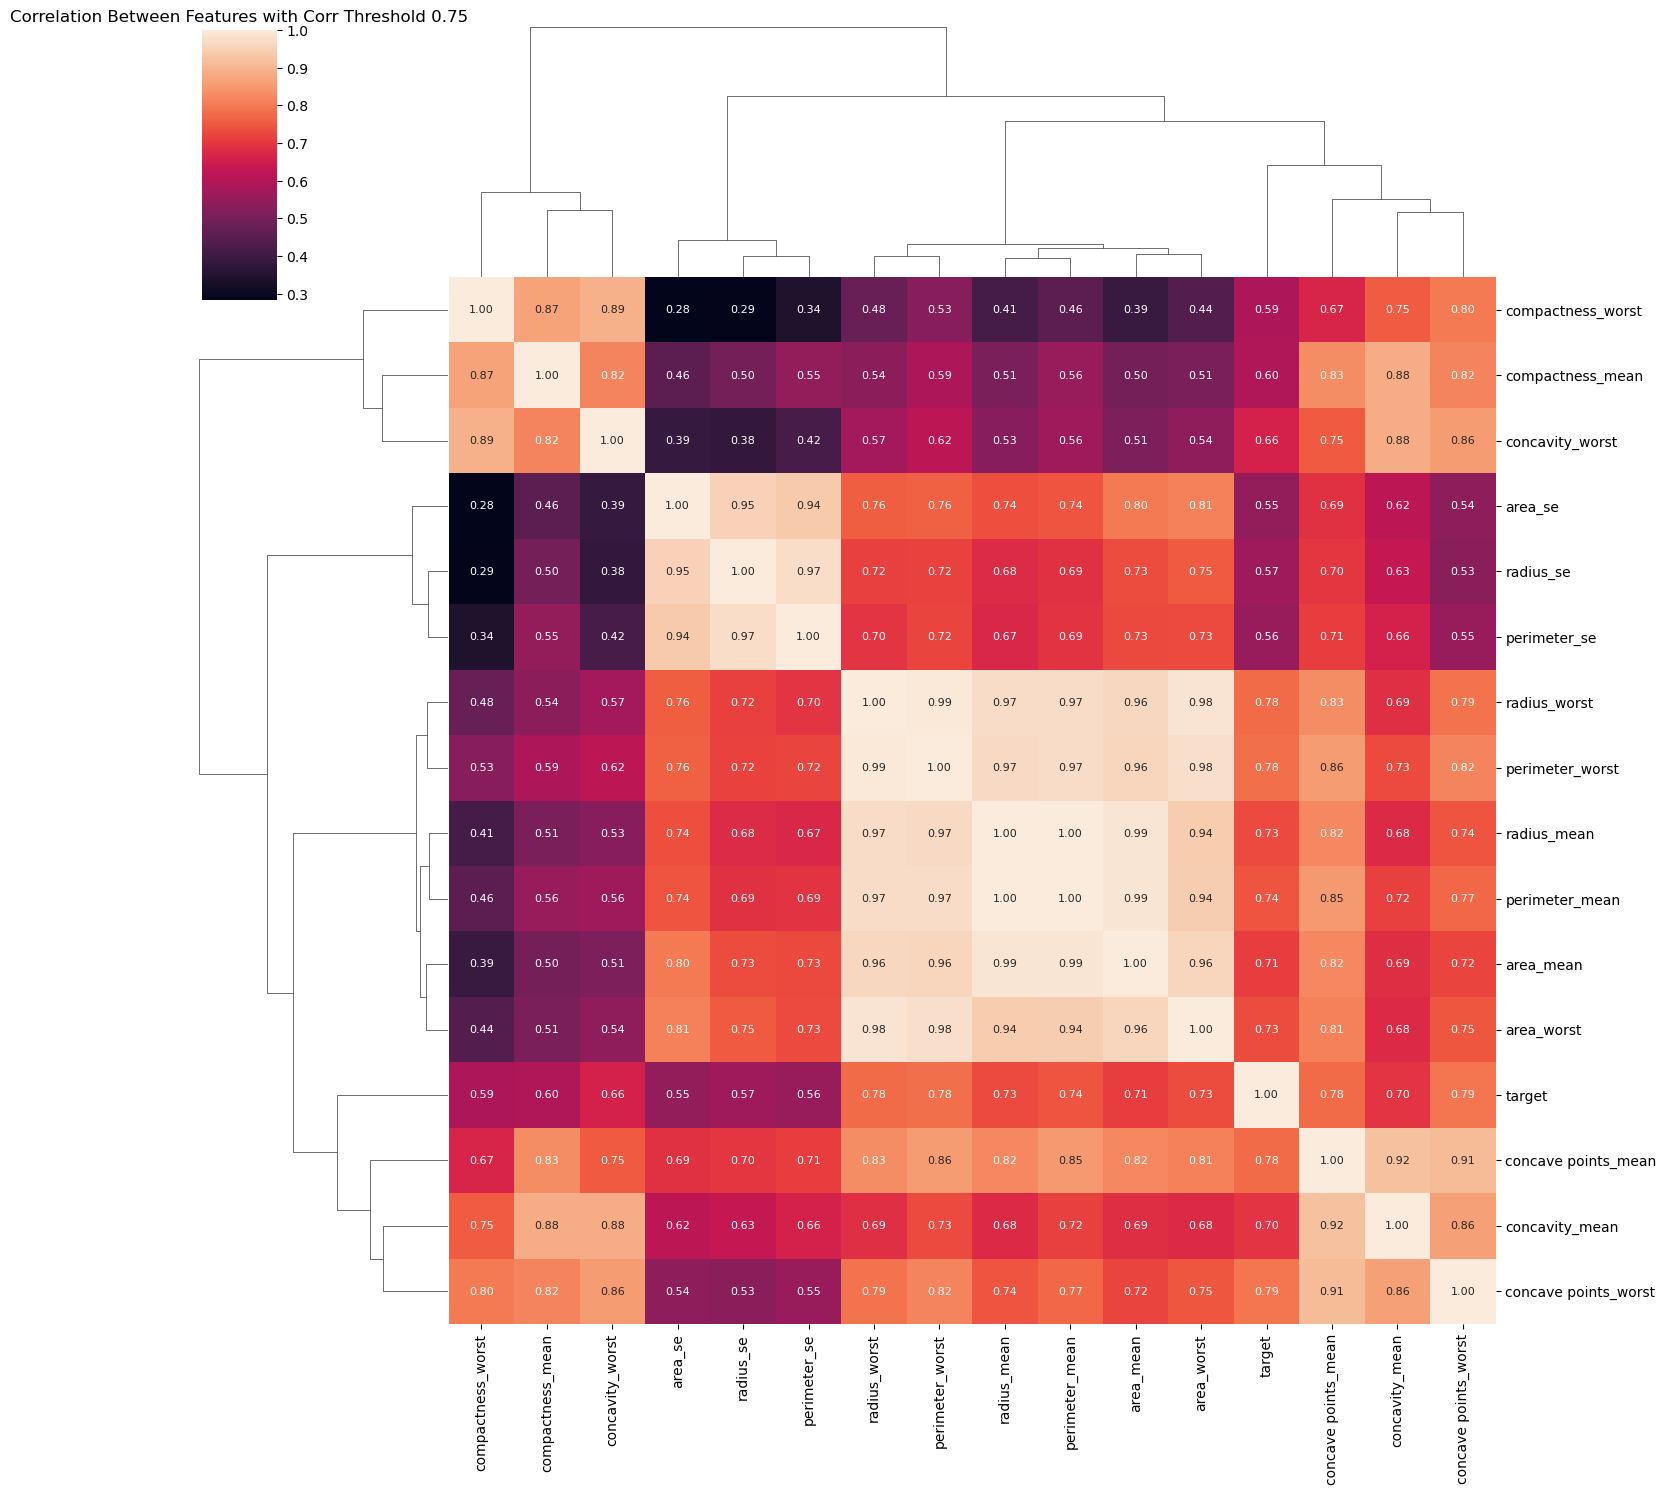

In [76]:
sns.clustermap(data[corr_features].corr(),annot=True,fmt=".2f",annot_kws={"size": 8}, figsize=(15, 15))
plt.title("Correlation Between Features with Corr Threshold 0.75")
plt.show()

In [77]:
#boxplot
data_melted=pd.melt(data,id_vars="target",
                   var_name="features",
                   value_name="value")

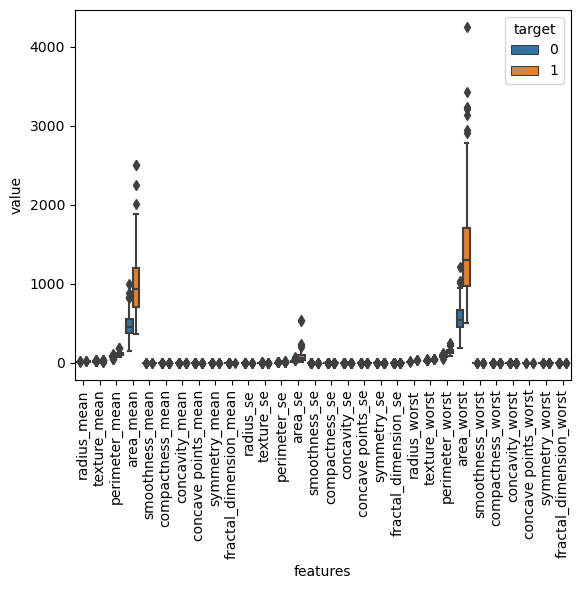

In [78]:
plt.figure()
sns.boxplot(x="features",y="value",hue="target",data=data_melted)
plt.xticks(rotation=90)
plt.show()

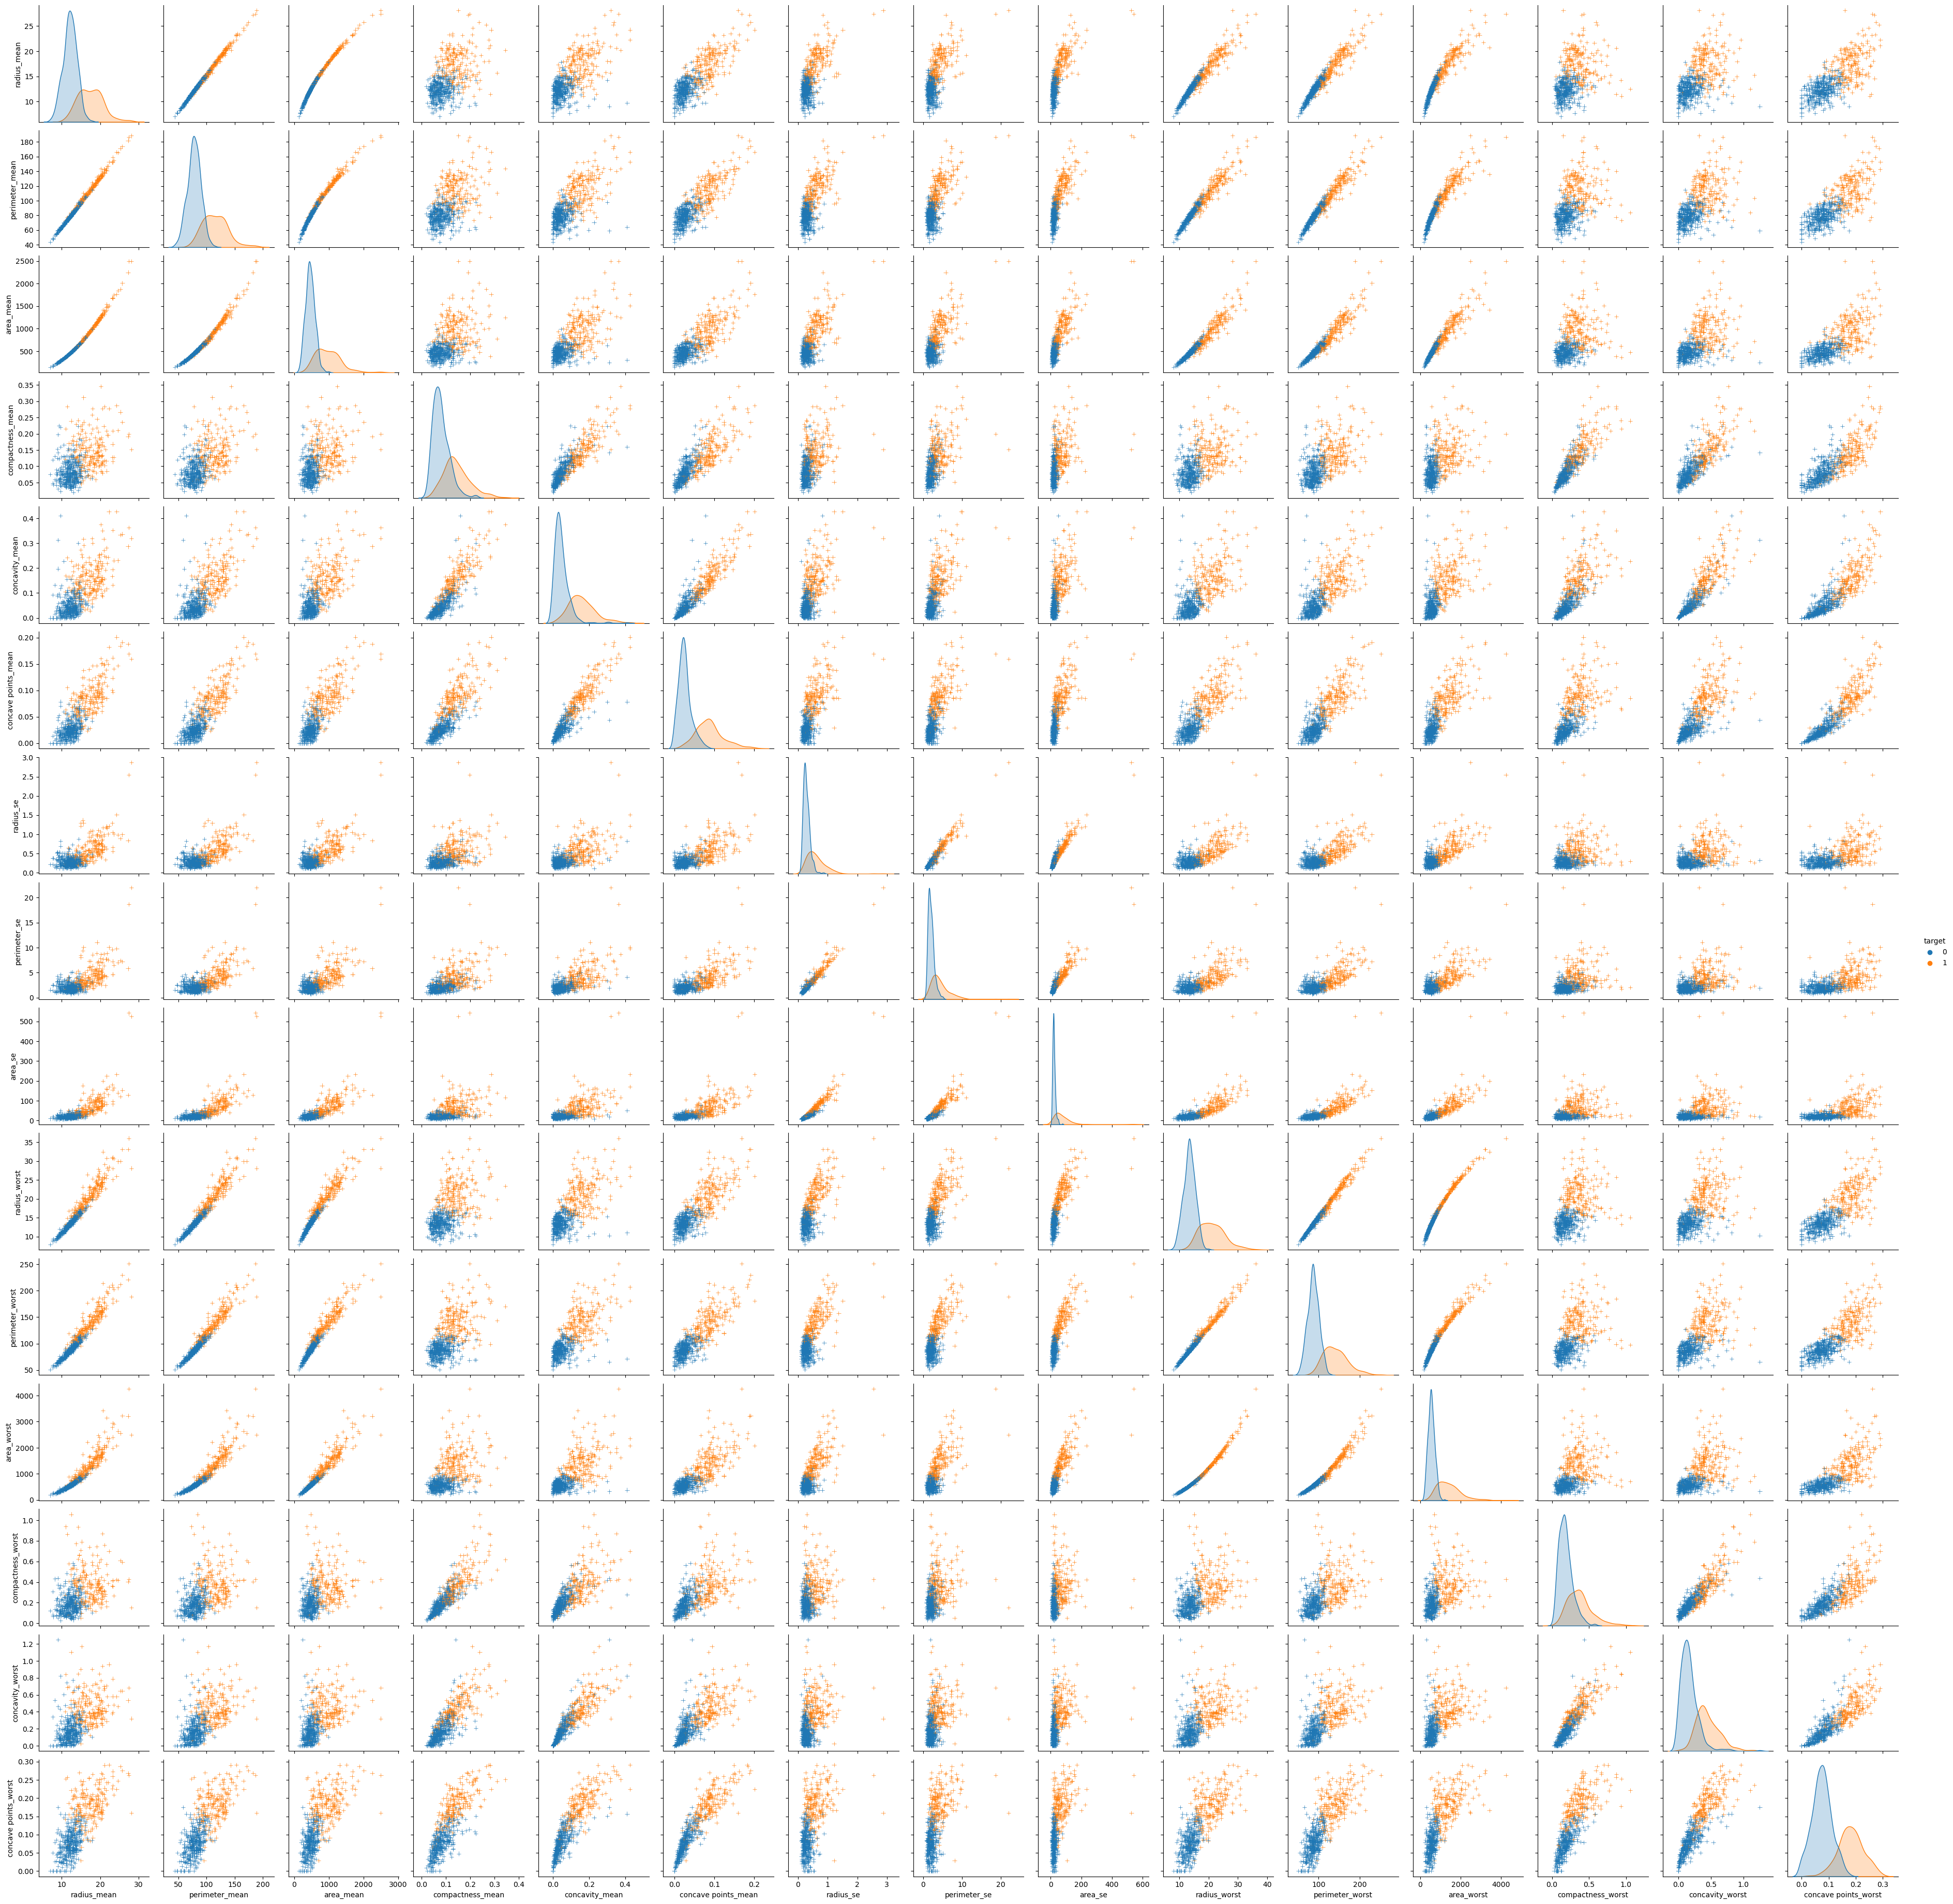

In [79]:
# pair plot
sns.pairplot(data[corr_features],diag_kind="kde",markers="+",hue="target")
plt.show()

* It is observed that there is skewness in the data.

## Density Based Outlier Detection System
### Local Outlier Factor (LOF)
* LOF is an effective method to detect outliers in skewed data.

In [80]:
#outlier
y=data.target
x=data.drop(["target"],axis=1)
columns=x.columns.tolist()

In [81]:
clf=LocalOutlierFactor()
y_pred=clf.fit_predict(x)
X_score=clf.negative_outlier_factor_

In [82]:
outlier_score=pd.DataFrame()
outlier_score["score"]=X_score

In [83]:
outlier_score

score
0   -1.422440
1   -1.066782
2   -0.978948
3   -1.596933
4   -1.069936
..        ...
564 -1.330082
565 -0.997906
566 -0.997441
567 -0.993730
568 -1.323238

[569 rows x 1 columns]

In [84]:
#threshold
threshold=-2.5
filtre=outlier_score["score"]<threshold
outlier_index=outlier_score[filtre].index.tolist()

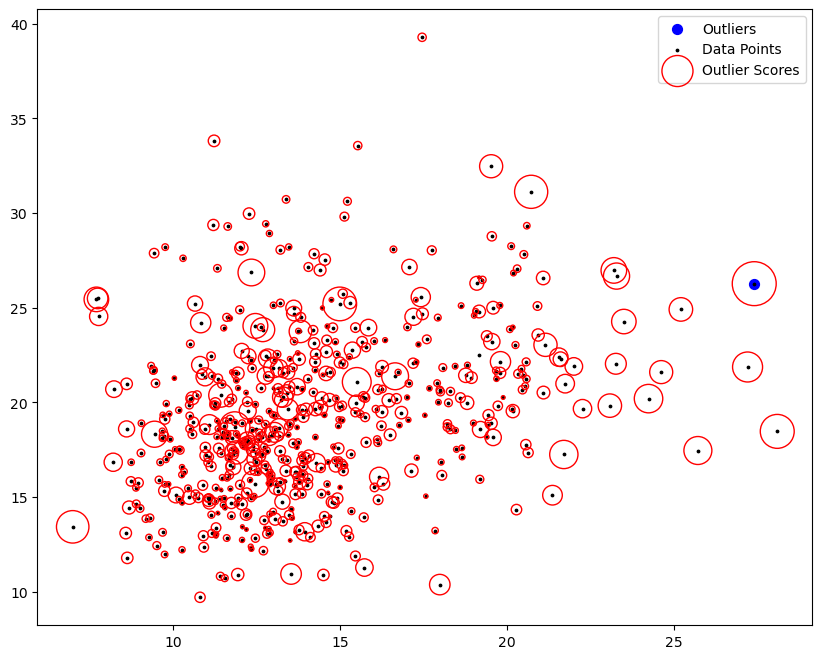

In [85]:
#scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(x.iloc[outlier_index,0],x.iloc[outlier_index,1],color="blue",s=50,label="Outliers")
plt.scatter(x.iloc[:,0],x.iloc[:,1],color="k",s=3,label="Data Points") #radius mean
radius=(X_score.max()-X_score)/(X_score.max()-X_score.min())
outlier_score["radius"]=radius
plt.scatter(x.iloc[:,0],x.iloc[:,1],color="k",s=1000*radius,edgecolors="r", facecolors="none", label="Outlier Scores")
plt.legend()
plt.show()

In [86]:
 #drop outliers
x=x.drop(outlier_index)
y=y.drop(outlier_index).values

## Train/Test Split

In [87]:
test_size=0.3
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=test_size,random_state=42)

In [88]:
print("X_train: {}".format(X_train.shape))
print("X_test: {}".format(X_test.shape))
print("y_train: {}".format(y_train.shape))
print("y_test: {}".format(y_test.shape))

X_train: (397, 30)
X_test: (171, 30)
y_train: (397,)
y_test: (171,)


## Standardization

In [89]:
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [90]:
X_train_df=pd.DataFrame(X_train, columns=columns)

In [91]:
X_train_df.describe().T

count          mean       std       min       25%  \
radius_mean              397.0  2.013503e-17  1.001262 -1.712388 -0.703945   
texture_mean             397.0 -2.953137e-16  1.001262 -2.175361 -0.729116   
perimeter_mean           397.0 -5.369341e-17  1.001262 -1.632924 -0.706559   
area_mean                397.0 -2.237225e-16  1.001262 -1.303791 -0.676538   
smoothness_mean          397.0 -3.803283e-17  1.001262 -2.404872 -0.708660   
compactness_mean         397.0 -2.192481e-16  1.001262 -1.638974 -0.767798   
concavity_mean           397.0  4.474450e-17  1.001262 -1.126020 -0.750522   
concave points_mean      397.0  7.159121e-17  1.001262 -1.291511 -0.746217   
symmetry_mean            397.0 -1.657784e-15  1.001262 -2.340956 -0.692302   
fractal_dimension_mean   397.0  6.700490e-16  1.001262 -1.731378 -0.715400   
radius_se                397.0 -2.226039e-16  1.001262 -1.087167 -0.623831   
texture_se               397.0  1.230474e-16  1.001262 -1.594208 -0.700868   
perimeter_se             397.0  1.633174e-16  1.001262 -1.076887 -0.607643   
area_se                  397.0  4.250728e-17  1.001262 -0.778684 -0.518833   
smoothness_se            397.0 -6.711676e-17  1.001262 -1.400632 -0.629688   
compactness_se           397.0  5.816786e-17  1.001262 -1.264283 -0.680645   
concavity_se             397.0  8.837040e-17  1.001262 -1.053454 -0.543889   
concave points_se        397.0 -9.396346e-17  1.001262 -1.910582 -0.647071   
symmetry_se              397.0 -1.946386e-16  1.001262 -1.517866 -0.660448   
fractal_dimension_se     397.0  1.398266e-16  1.001262 -1.036680 -0.547544   
radius_worst             397.0  1.566058e-16  1.001262 -1.554165 -0.682195   
texture_worst            397.0 -4.608684e-16  1.001262 -2.165353 -0.752864   
perimeter_worst          397.0 -4.541567e-16  1.001262 -1.558852 -0.701944   
area_worst               397.0 -6.487953e-17  1.001262 -1.163524 -0.657838   
smoothness_worst         397.0  6.577442e-16  1.001262 -2.217924 -0.752798   
compactness_worst        397.0 -1.118613e-16  1.001262 -1.426295 -0.671507   
concavity_worst          397.0  8.054011e-17  1.001262 -1.351626 -0.754793   
concave points_worst     397.0 -7.159121e-17  1.001262 -1.782104 -0.784794   
symmetry_worst           397.0 -5.481202e-17  1.001262 -2.098683 -0.668746   
fractal_dimension_worst  397.0  4.027005e-17  1.001262 -1.623010 -0.693848   

                              50%       75%        max  
radius_mean             -0.244643  0.491975   4.033514  
texture_mean            -0.110944  0.564893   4.645288  
perimeter_mean          -0.254962  0.533649   4.063861  
area_mean               -0.298915  0.385257   5.327298  
smoothness_mean         -0.098706  0.608641   4.767417  
compactness_mean        -0.250004  0.541814   4.097233  
concavity_mean          -0.355931  0.466371   4.417475  
concave points_mean     -0.388883  0.674094   4.049923  
symmetry_mean           -0.035758  0.558779   4.490747  
fractal_dimension_mean  -0.177448  0.484541   4.845302  
radius_se               -0.282190  0.293538   9.189961  
texture_se              -0.188697  0.486054   4.583425  
perimeter_se            -0.278710  0.259403   9.830837  
area_se                 -0.346675  0.139942  11.702701  
smoothness_se           -0.208272  0.338066   7.693190  
compactness_se          -0.269077  0.328557   6.131052  
concavity_se            -0.213853  0.284913  12.309970  
concave points_se       -0.134145  0.424392   6.537894  
symmetry_se             -0.225543  0.310192   4.990888  
fractal_dimension_se    -0.239229  0.227916   9.364540  
radius_worst            -0.271530  0.488093   3.590418  
texture_worst           -0.057089  0.675730   3.877586  
perimeter_worst         -0.280914  0.533921   3.782128  
area_worst              -0.343023  0.288443   4.325859  
smoothness_worst        -0.040978  0.609704   3.771406  
compactness_worst       -0.283014  0.598284   4.615614  
concavity_worst         -0.248717  0.594745   3.461489  
concave po

In [92]:
X_train_df["target"]=y_train

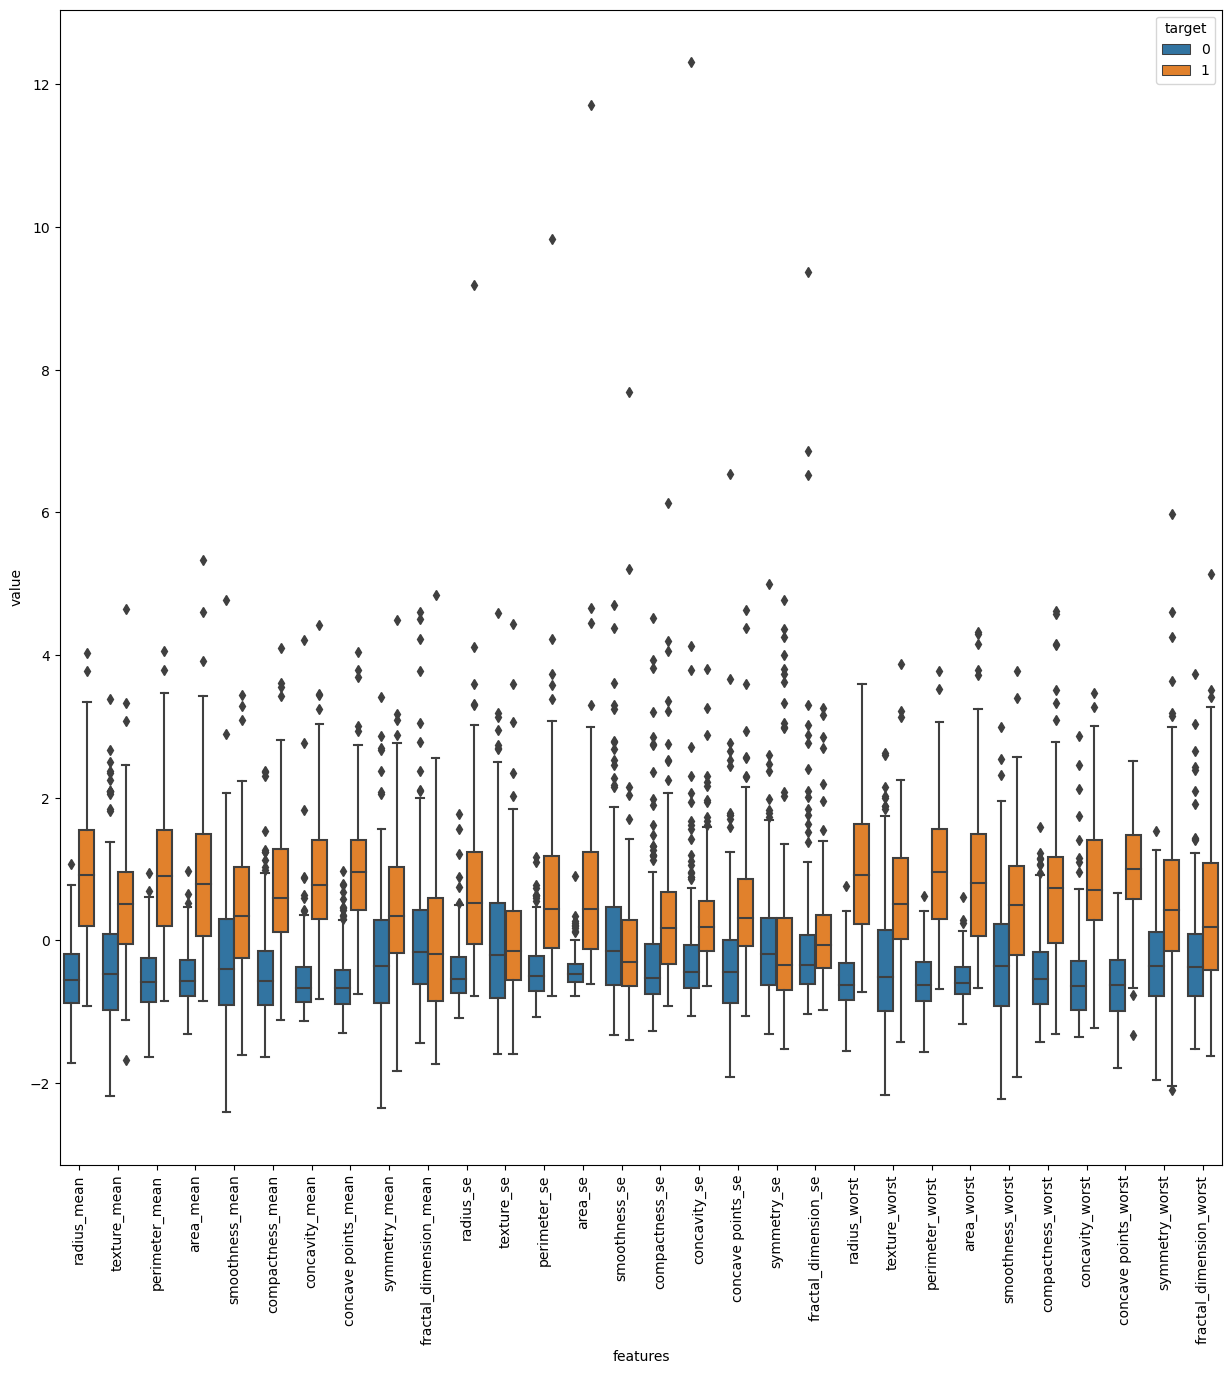

In [93]:
#boxplot
data_melted=pd.melt(X_train_df,id_vars="target",
                   var_name="features",
                   value_name="value")

plt.figure(figsize=(15,15)),
sns.boxplot(x="features",y="value",hue="target",data=data_melted)
plt.xticks(rotation=90)
plt.show()

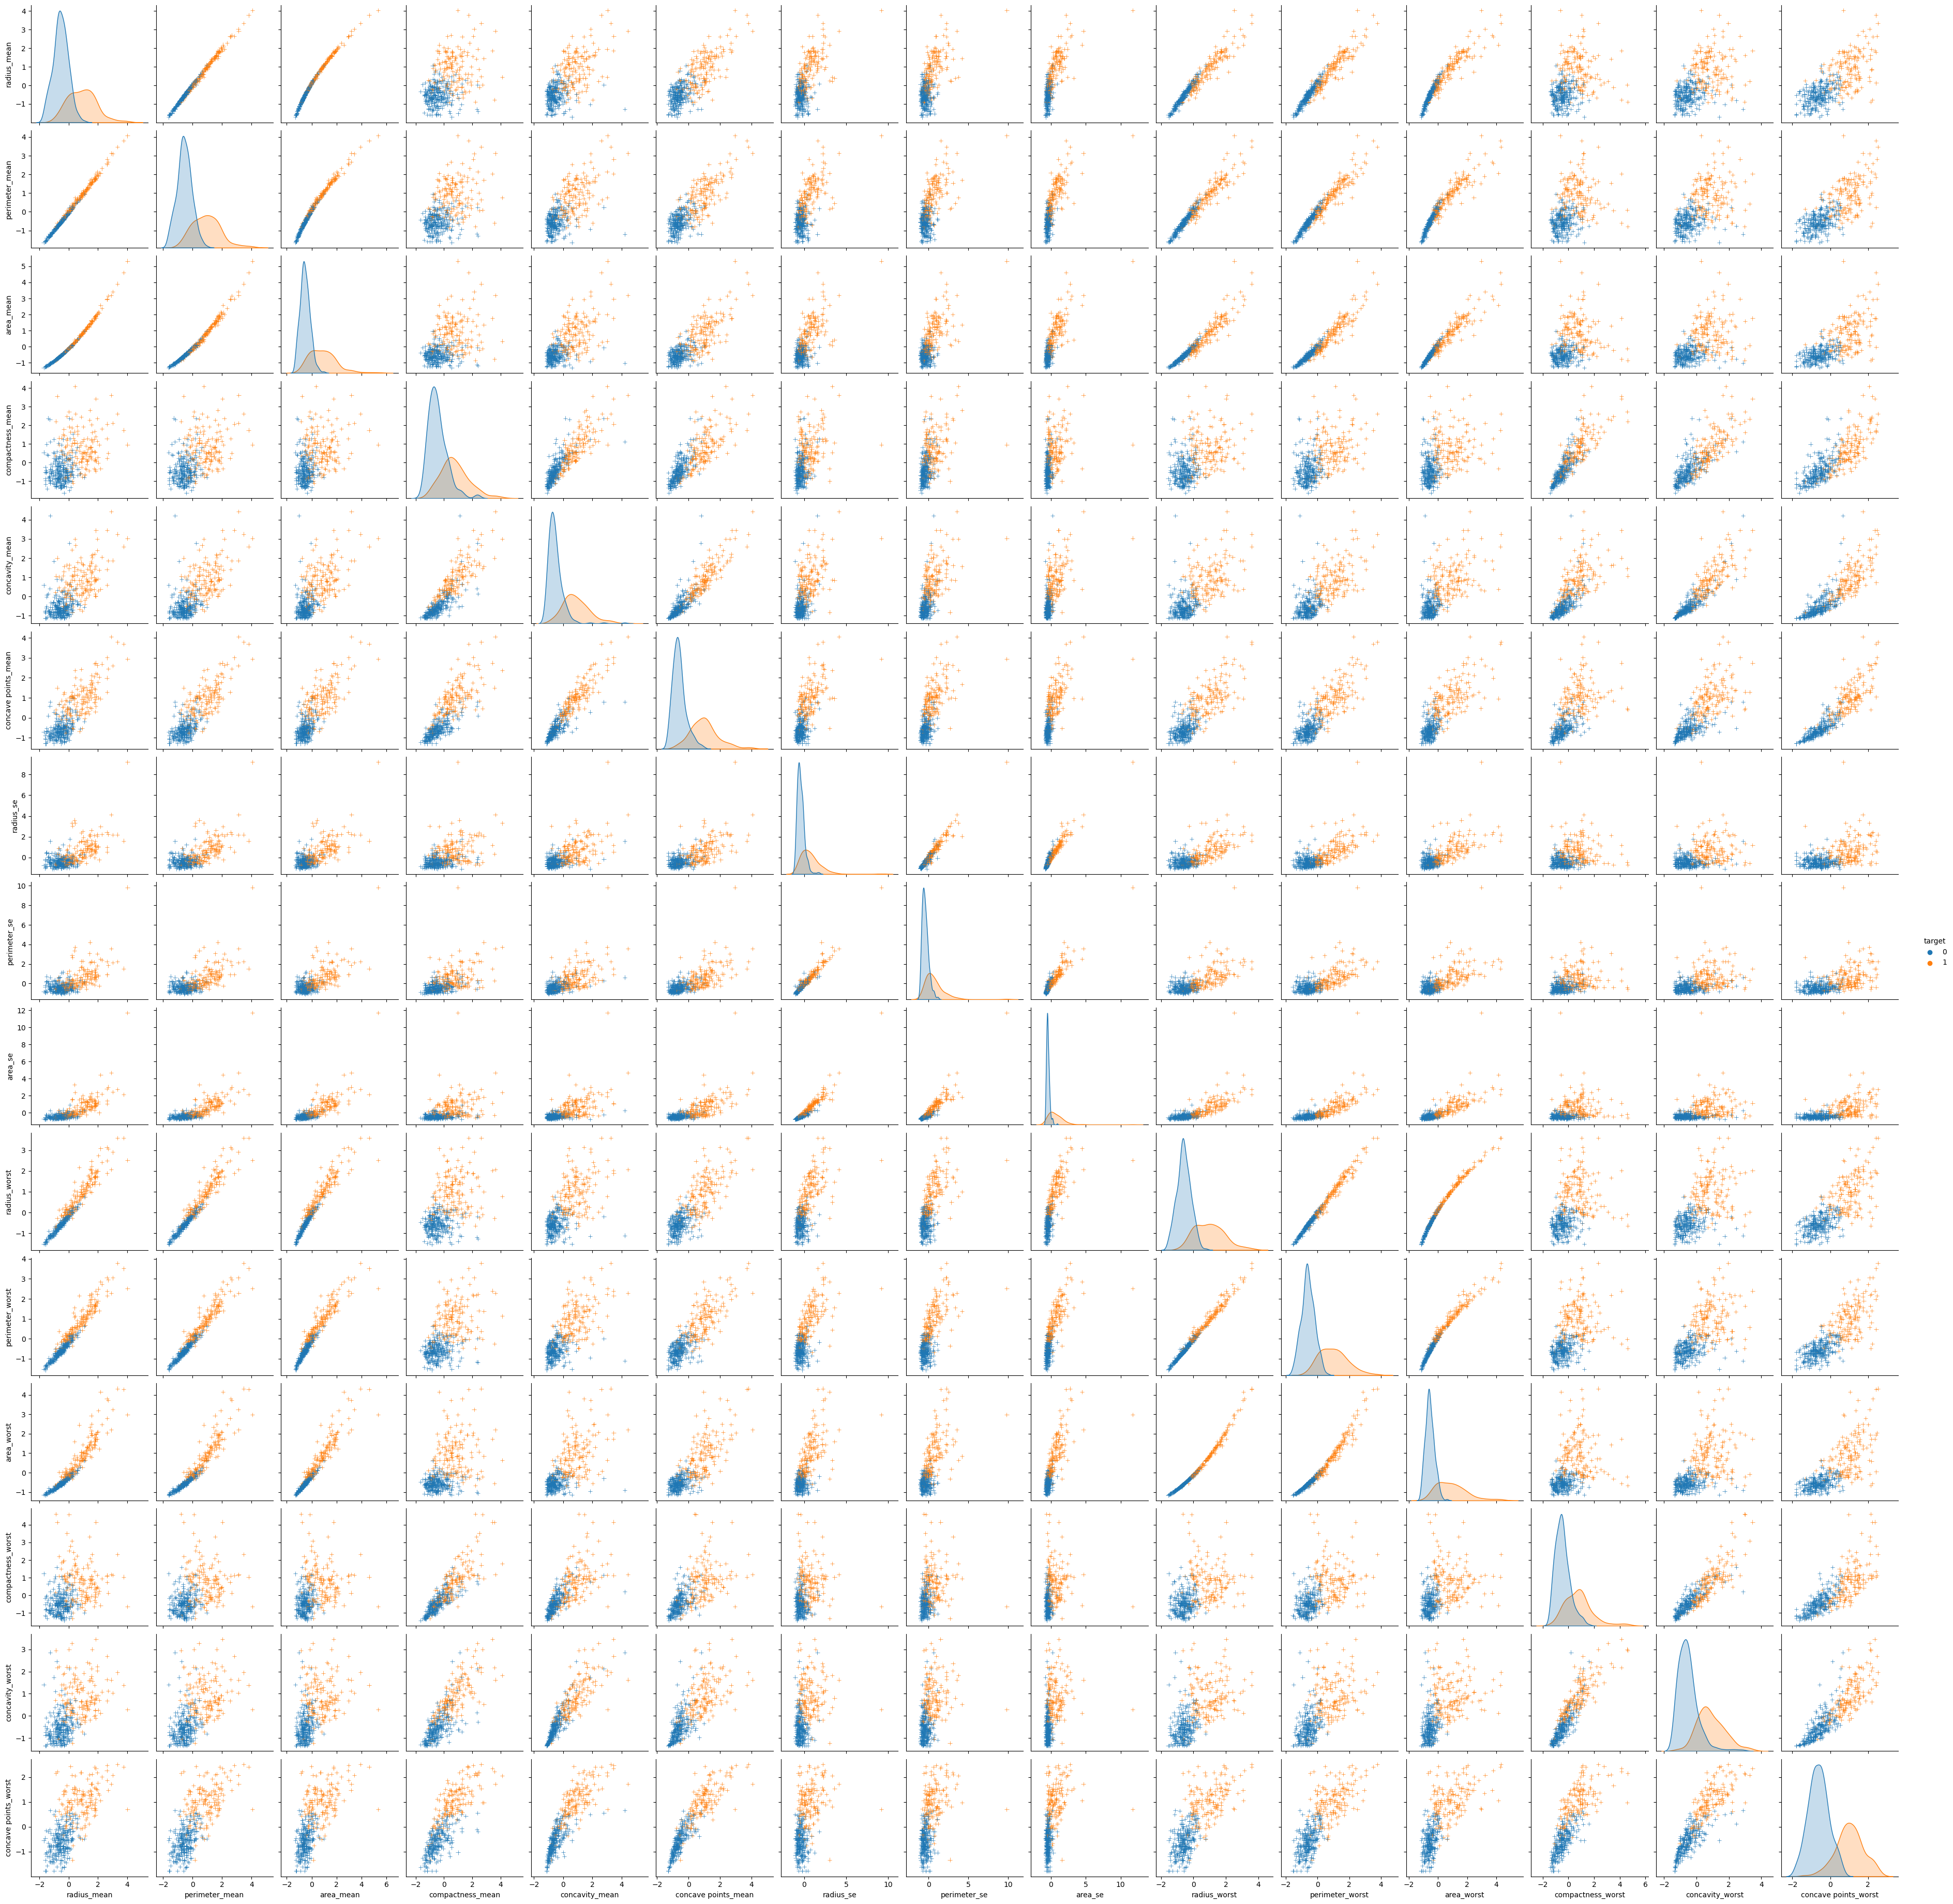

In [94]:
# pair plot
sns.pairplot(X_train_df[corr_features],diag_kind="kde",markers="+",hue="target")
plt.show()

## K-NN Method 

In [95]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
acc=accuracy_score(y_test,y_pred)
score=knn.score(X_test,y_test)
print("Score: ",score)
print("Confusion Matrix: \n",cm)
print("KNN Accuracy: ",acc)

Score:  0.9532163742690059
Confusion Matrix: 
 [[108   1]
 [  7  55]]
KNN Accuracy:  0.9532163742690059


## K-NN Hyperparameter Tuning

In [96]:
def KNN_Best_Params(x_train, x_test, y_train, y_test):
    
    k_range = list(range(1, 31))
    weight_options = ["uniform", "distance"]
    p_options = [1, 2]
    param_grid = dict(n_neighbors=k_range, weights=weight_options, p=p_options)
    
    knn = KNeighborsClassifier()
    grid = GridSearchCV(knn, param_grid, cv=10, scoring="accuracy")
    grid.fit(x_train, y_train)
    
    print("Best training score: {} with parameters: {}".format(grid.best_score_, grid.best_params_))
    
    # Fit the KNN with best parameters
    knn_best = KNeighborsClassifier(**grid.best_params_)
    knn_best.fit(x_train, y_train)
    
    y_pred_test = knn_best.predict(x_test)
    y_pred_train = knn_best.predict(x_train)
    
    cm_test = confusion_matrix(y_test, y_pred_test)
    cm_train = confusion_matrix(y_train, y_pred_train)
    
    acc_test = accuracy_score(y_test, y_pred_test)
    acc_train = accuracy_score(y_train, y_pred_train)
    
    print("Test score: {}, Train score: {}".format(acc_test, acc_train))
    print("CM Test: ", cm_test)
    print("CM Train: ", cm_train)
    
    # Return the best KNN model instead of grid
    return knn_best


In [97]:
grid=KNN_Best_Params(X_train,X_test,y_train,y_test)

Best training score: 0.9696153846153847 with parameters: {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
Test score: 0.9590643274853801, Train score: 0.9773299748110831
CM Test:  [[106   3]
 [  4  58]]
CM Train:  [[247   1]
 [  8 141]]


## PCA

In [98]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

Text(0.5, 1.0, 'PCA: p1 vs p2')

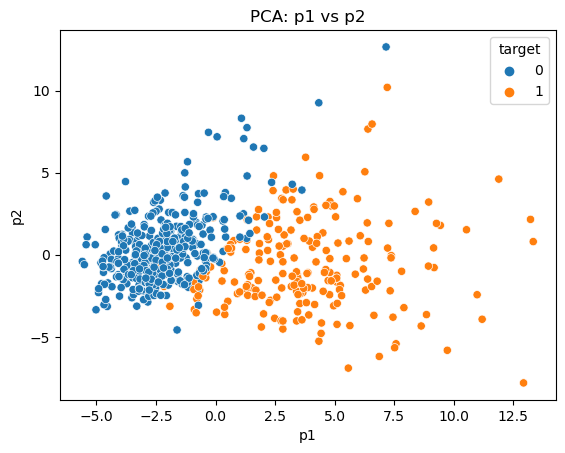

In [99]:
pca=PCA(n_components=2)
pca.fit(x_scaled)
X_reduced_pca=pca.transform(x_scaled)
pca_data=pd.DataFrame(X_reduced_pca,columns=["p1","p2"])
pca_data["target"]=y
sns.scatterplot(x="p1",y="p2",hue="target",data=pca_data)
plt.title("PCA: p1 vs p2")

In [100]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca=train_test_split(X_reduced_pca,y,test_size=test_size,random_state=42)


In [101]:
grid_pca=KNN_Best_Params(X_train_pca, X_test_pca, y_train_pca, y_test_pca)

Best training score: 0.9419230769230769 with parameters: {'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}
Test score: 0.9239766081871345, Train score: 0.947103274559194
CM Test:  [[103   6]
 [  7  55]]
CM Train:  [[241   7]
 [ 14 135]]


In [102]:
#visualize
cmap_light=ListedColormap(["orange","cornflowerblue"])
cmap_bold=ListedColormap(["darkorange","darkblue"])

h=.05 #step size in the mash
X=X_reduced_pca
x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
y_min,y_max=X[:,0].min()-1,X[:,0].max()+1

xx,yy =np.meshgrid(np.arange(x_min,x_max, h),
                  np.arange(y_min,y_max,h))

Z=grid_pca.predict(np.c_[xx.ravel(),yy.ravel()])

Text(0.5, 1.0, "2-Class calssification (k=9,weights='uniform')")

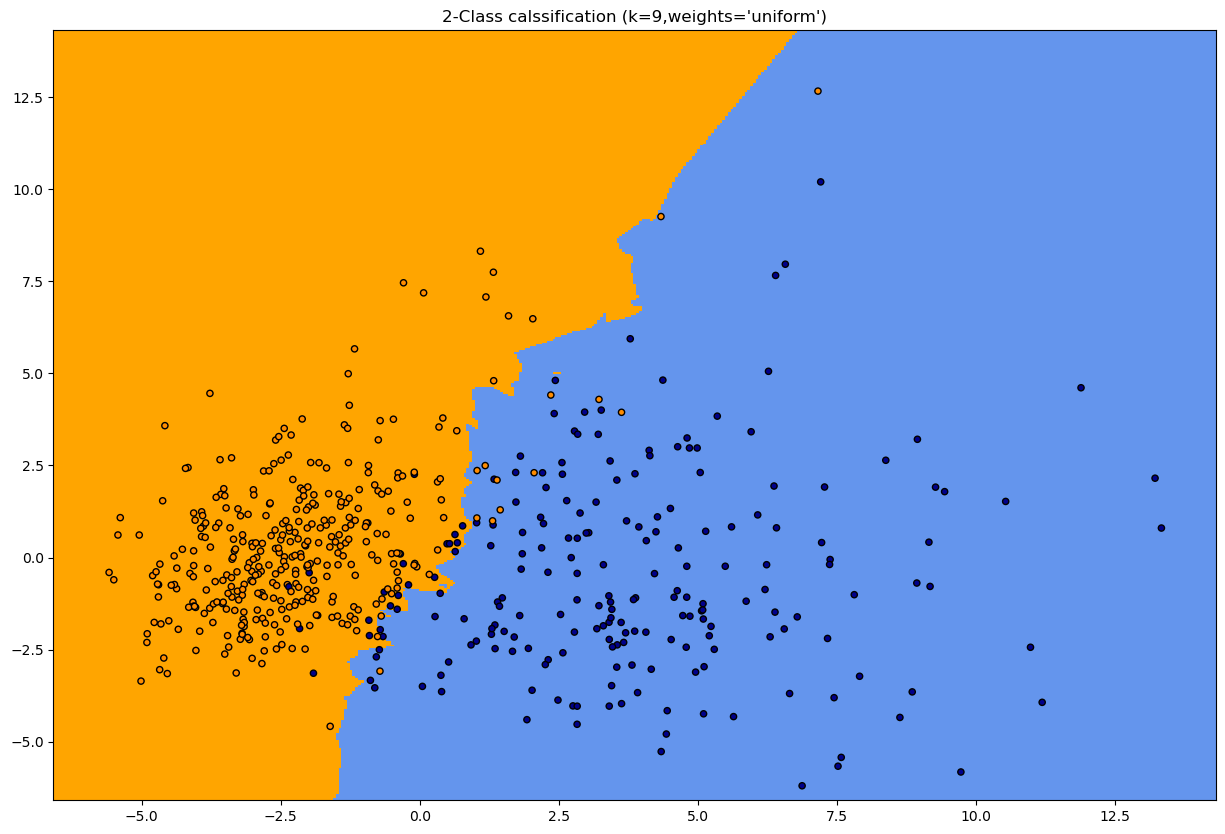

In [103]:
#Put the result into a color plot
Z=Z.reshape(xx.shape)
plt.figure(figsize=(15,10))
plt.pcolormesh(xx,yy,Z,cmap=cmap_light)

#Plot also the trainin points
plt.scatter(X[:,0],X[:,1],c=y,cmap=cmap_bold,edgecolors="k",s=20)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title("%i-Class calssification (k=%i,weights='%s')"%(len(np.unique(y)),grid_pca.n_neighbors,grid_pca.weights))

## NCA

Text(0.5, 1.0, 'NCA: p1 vs p2')

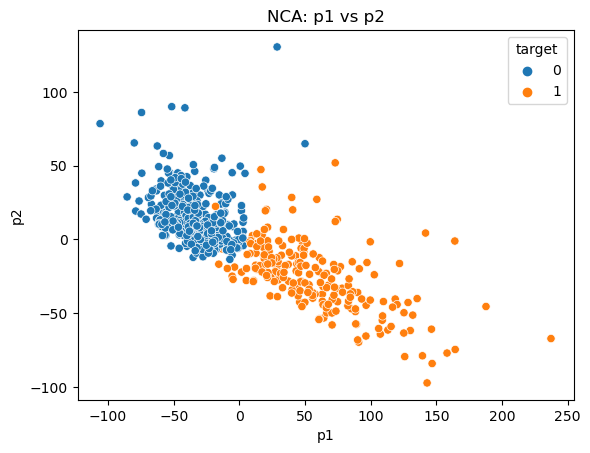

In [104]:
nca=NeighborhoodComponentsAnalysis(n_components=2,random_state=42)
nca.fit(x_scaled,y)
X_reduced_nca=nca.transform(x_scaled)
nca_data=pd.DataFrame(X_reduced_nca,columns=["p1","p2"])
nca_data["target"]=y
sns.scatterplot(x="p1",y="p2",hue="target",data=nca_data)
plt.title("NCA: p1 vs p2")

In [105]:
X_train_nca, X_test_nca, y_train_nca, y_test_nca=train_test_split(X_reduced_nca,y,test_size=test_size,random_state=42)
grid_nca=KNN_Best_Params(X_train_nca, X_test_nca, y_train_nca, y_test_nca)

Best training score: 0.9898717948717948 with parameters: {'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
Test score: 0.9941520467836257, Train score: 1.0
CM Test:  [[108   1]
 [  0  62]]
CM Train:  [[248   0]
 [  0 149]]


Text(0.5, 1.0, "2-Class calssification (k=9,weights='uniform')")

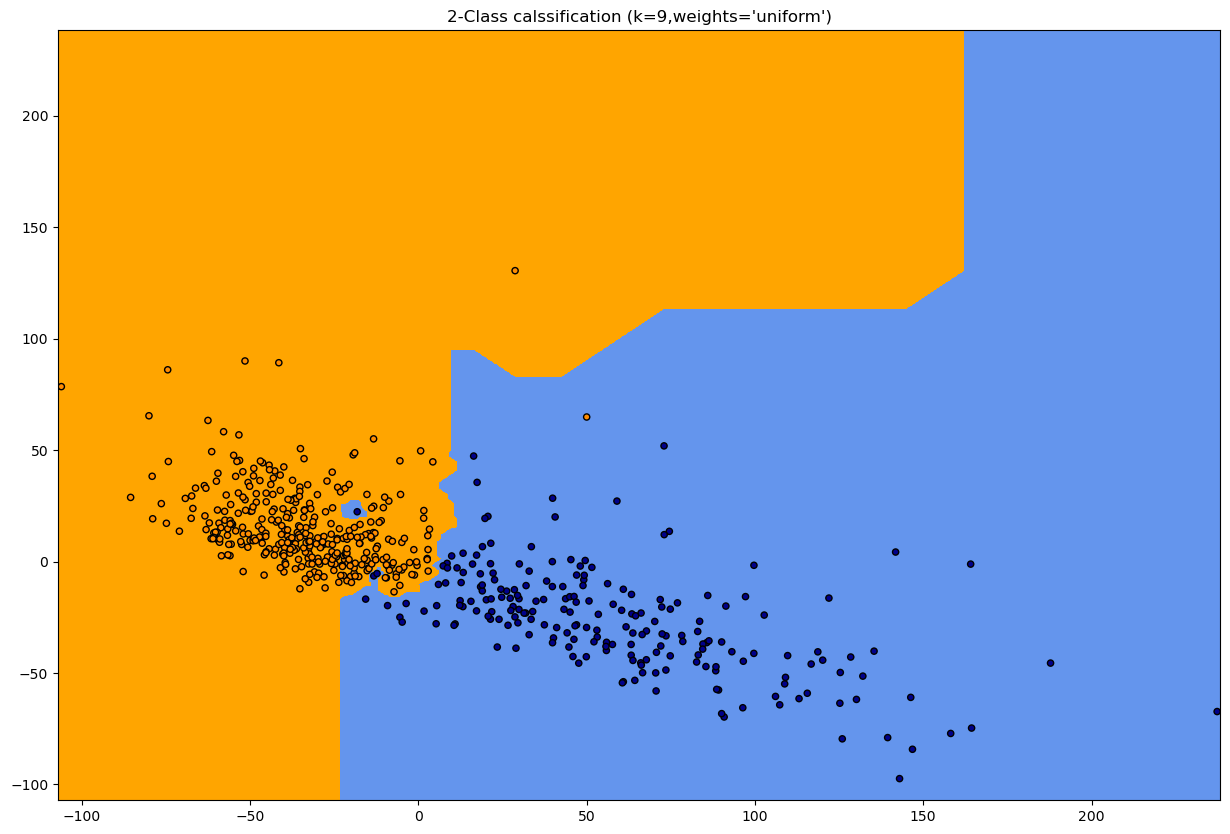

In [106]:
#visualize
cmap_light=ListedColormap(["orange","cornflowerblue"])
cmap_bold=ListedColormap(["darkorange","darkblue"])

h=.2 #step size in the mash
X=X_reduced_nca
x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
y_min,y_max=X[:,0].min()-1,X[:,0].max()+1

xx,yy =np.meshgrid(np.arange(x_min,x_max, h),
                  np.arange(y_min,y_max,h))

Z=grid_nca.predict(np.c_[xx.ravel(),yy.ravel()])

#Put the result into a color plot
Z=Z.reshape(xx.shape)
plt.figure(figsize=(15,10))
plt.pcolormesh(xx,yy,Z,cmap=cmap_light)

#Plot also the trainin points
plt.scatter(X[:,0],X[:,1],c=y,cmap=cmap_bold,edgecolors="k",s=20)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title("%i-Class calssification (k=%i,weights='%s')"%(len(np.unique(y)),grid_pca.n_neighbors,grid_nca.weights))

## Conclusion

* Firstly, KNN was applied to the data and a 95% accuracy score was obtained from the test data.

* Hyperparameter tuning was performed, but the expected change in the accuracy score was not observed. In the test data, the accuracy score was observed as 95%.

* PCA was applied to represent the data with fewer variables, but a decrease in accuracy was observed. Accuracy score was recorded as 92%.

* With Neighborhood Component Analysis, 99% accuracy score was achieved in the test data. 98% accuracy rate was recorded in the training data. This means that the model works successfully without overfit.